In [1]:
import sys
import argparse
import torch
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

import Pk_library as PKL

sys.path.append('/home/ajliang/search')

device = torch.device("cpu")

In [45]:
args = argparse.Namespace(
    init_input_path="/user_data/ajliang/Linear/val/LH0045/4/dis.npy",
    style_path="/user_data/ajliang/Linear/val/LH0045/4/params.npy",
    target_output_path="/user_data/ajliang/Nonlinear/val/LH0045/4/dis.npy",
    verbose=False,
)

from search.utils.search_utils import initialize_style_input_target
_, _, _, true_input = initialize_style_input_target(args, device)
# remove batch dimension
true_input = true_input.squeeze(0)
# convert to numpy
true_input = true_input.numpy()

In [23]:
learned_input = torch.load("/home/ajliang/search/checkpoints/SEARCH-WITH-DREW-FWD-MODEL_2022-12-16-17-22-12/input_573000.pt", map_location=device)
# remove batch dimension
learned_input = learned_input.squeeze(0)
# convert to numpy
learned_input = learned_input.detach().numpy()

In [52]:
wave_num = xpk.k3D


Computing power spectra of the fields...
Time FFTS = 0.09
Time loop = 0.08
Time taken = 0.17 seconds


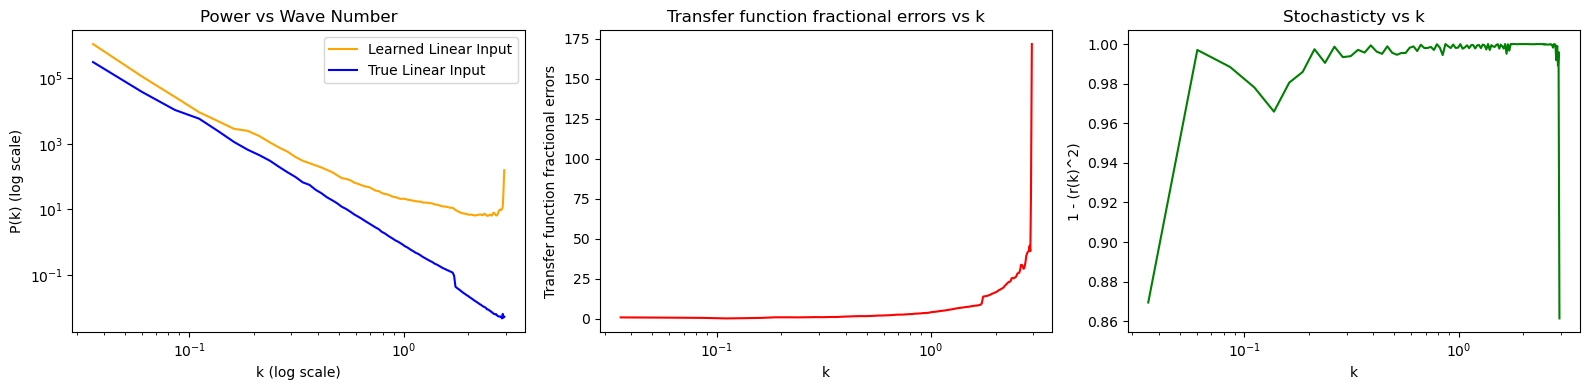

In [70]:
"""
Power Spectrum of the learned input and the true input
"""
axis = 2
xpk = PKL.XPk((learned_input[axis], true_input[axis]),
              BoxSize=1e3/512 * 128, axis=0, MAS=(None, None))
learned_input_auto = xpk.Pk[:, 0, 0]
true_input_auto = xpk.Pk[:, 0, 1]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
ax1.loglog(wave_num, learned_input_auto,
          color="orange", label="Learned Linear Input")
ax1.loglog(wave_num, true_input_auto,
          color="blue", label="True Linear Input")

ax1.set_xlabel("k (log scale)")
ax1.set_ylabel("P(k) (log scale)")
ax1.legend()
ax1.set_title("Power vs Wave Number")

"""
Transfer Function Fractional Errors
"""
tf_error = np.sqrt(learned_input_auto / true_input_auto) - 1 # fractional error in transfer function
# plot the transfer function fractional errors
ax2.semilogx(wave_num, tf_error, color="red")
ax2.set_xlabel('k')
ax2.set_ylabel('Transfer function fractional errors')
ax2.set_title('Transfer function fractional errors vs k')

"""
Stochasticity
"""
# plot the stochasticity
cross = xpk.XPk[:, 0][:, 0] # cross power spectrum
stoc = 1 - (cross / np.sqrt(learned_input_auto * true_input_auto))**2 # stochasticity
ax3.semilogx(wave_num, stoc, color="green")
ax3.set_xlabel('k')
ax3.set_ylabel('1 - (r(k)^2)')
ax3.set_title('Stochasticty vs k')

fig.tight_layout()
plt.show()

In [65]:
xpk.XPk.shape

(117, 3, 1)

In [64]:
xpk.XPk[:, 0].shape

(117, 1)

In [68]:
xpk.XPk[:, 0][:, 0].shape

(117,)

In [56]:
plt.show()